In [1]:
# Importing neccsary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


2023-11-07 18:54:17.024977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 18:54:18.630148: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Loading dataset for preprocessing
df=pd.read_csv('./Dataset/Unzip/Credit_Card.csv')
df=df[0:30000]


In [3]:
# Extracting the column name for the dataset
column=df.columns
column

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
# df.drop_duplicates()
# Dropping duplicate value since dataset is very large

In [5]:
# fig=plt.figure(figsize=(10,7))
# df['type'].value_counts(normalize=True).plot(kind='bar')

## Univariate Analysis


/tmp/ipykernel_14219/1086040597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'])


<Axes: xlabel='amount', ylabel='Density'>

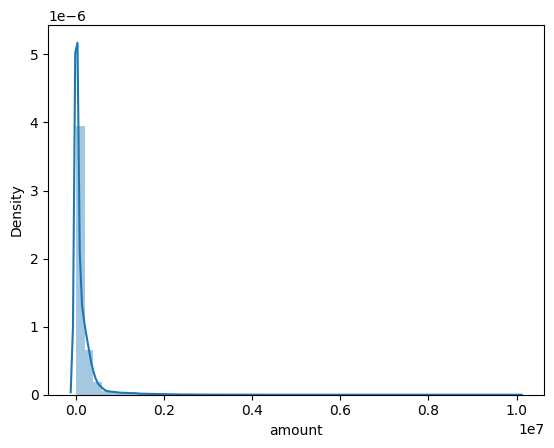

In [6]:
sns.distplot(df['amount'])

/tmp/ipykernel_14219/2318427200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'])


<Axes: xlabel='step', ylabel='Density'>

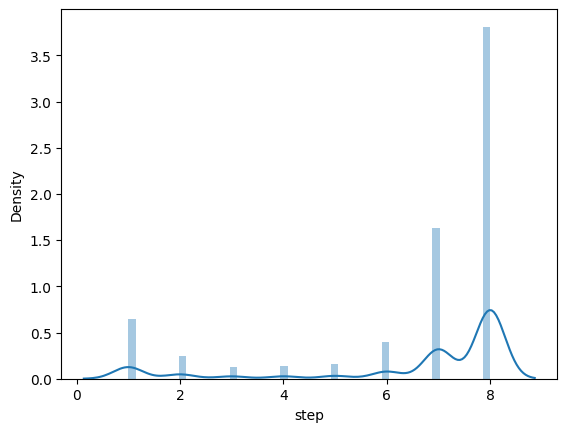

In [7]:
sns.distplot(df['step'])

<Axes: xlabel='step', ylabel='Count'>

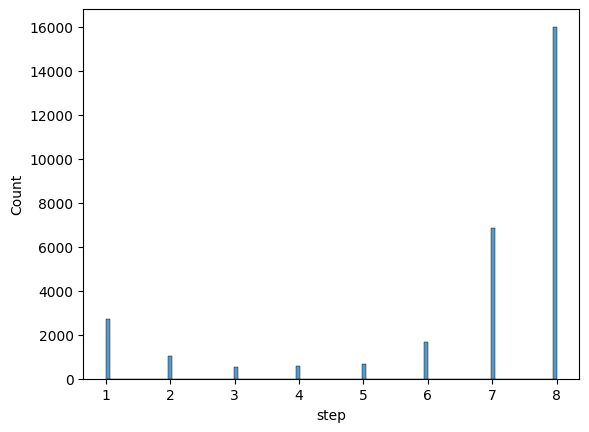

In [8]:
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

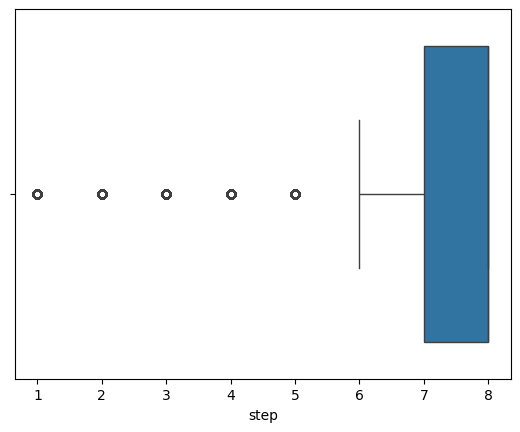

In [9]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

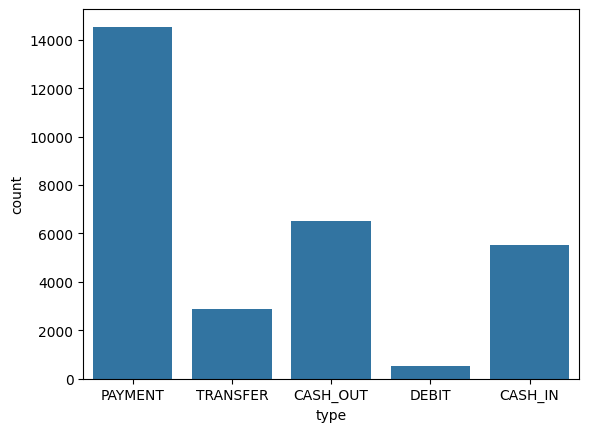

In [10]:
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

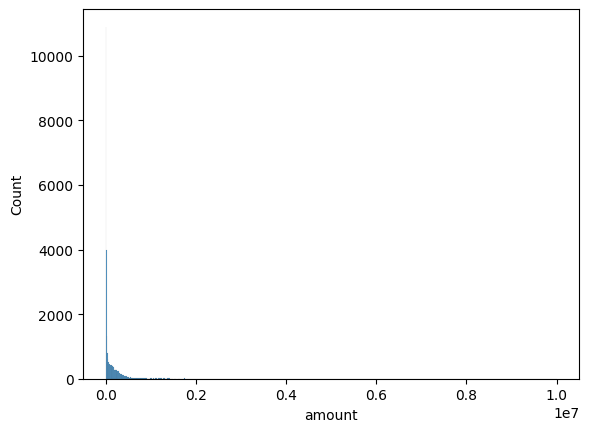

In [11]:
sns.histplot(data=df,x='amount')
# amount

<Axes: xlabel='amount'>

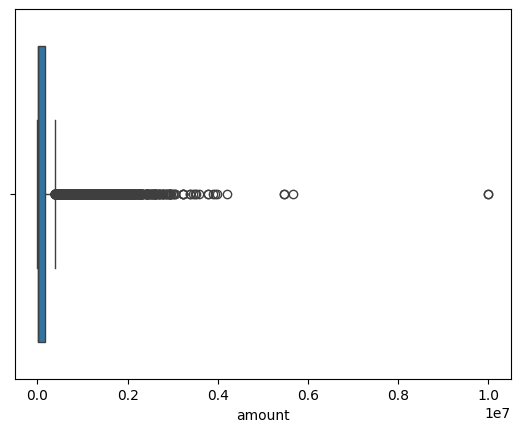

In [12]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

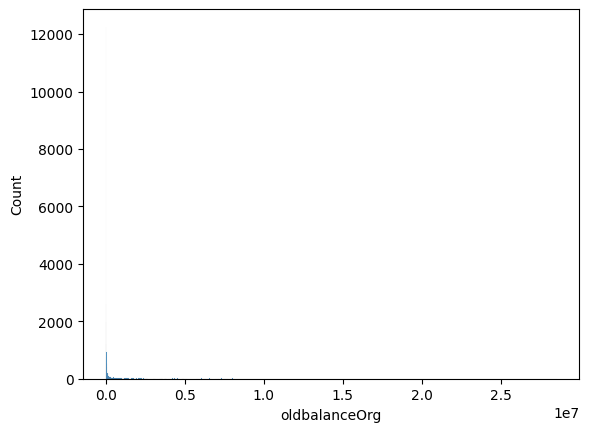

In [13]:
sns.histplot(data=df,x='oldbalanceOrg')

In [14]:
df['nameDest'].value_counts()

nameDest
C985934102     71
C1286084959    61
C1590550415    60
C2083562754    59
C248609774     57
               ..
M1553206824     1
M961994506      1
M244114865      1
M1693575672     1
M640263118      1
Name: count, Length: 17801, dtype: int64

<Axes: xlabel='oldbalanceDest'>

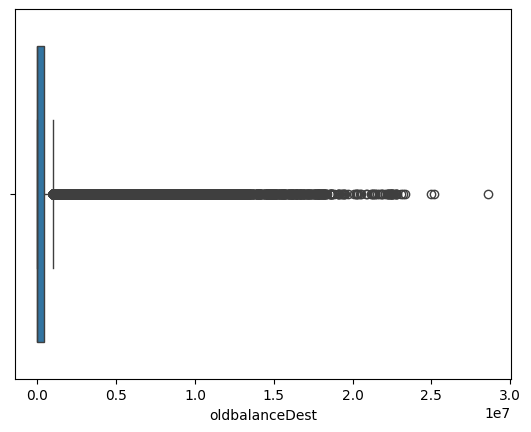

In [15]:
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

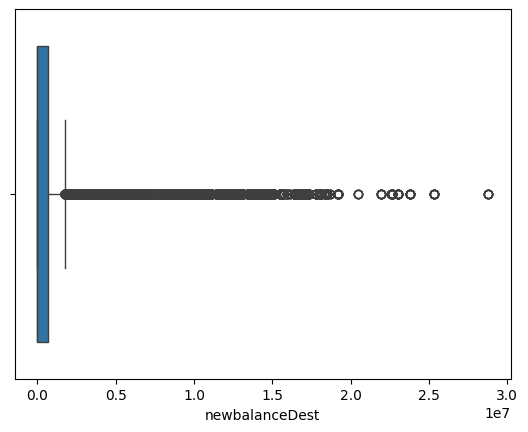

In [16]:
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

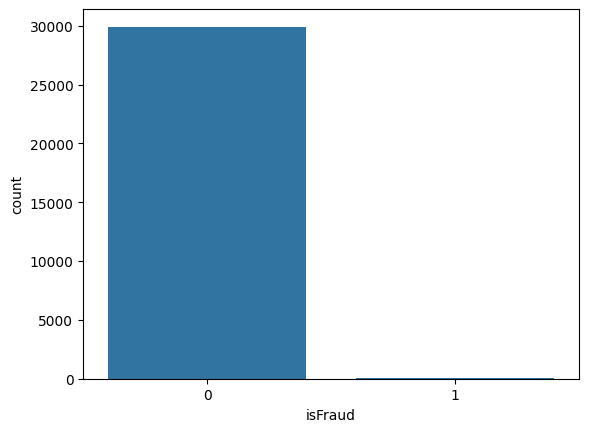

In [17]:
# isFraud
sns.countplot(data=df,x='isFraud')

## Bivariate Analysiss

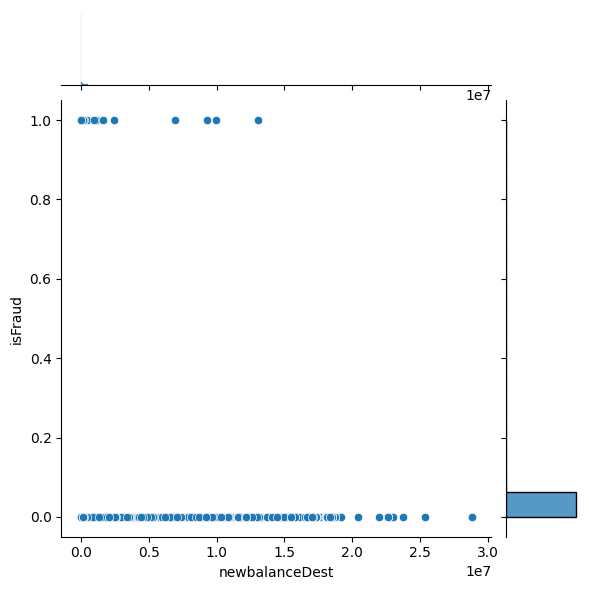

In [18]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

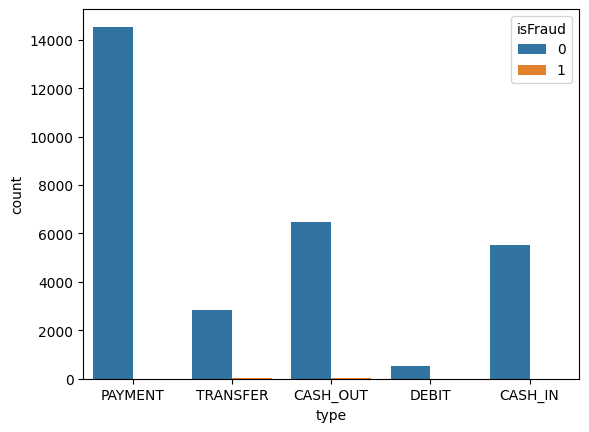

In [19]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

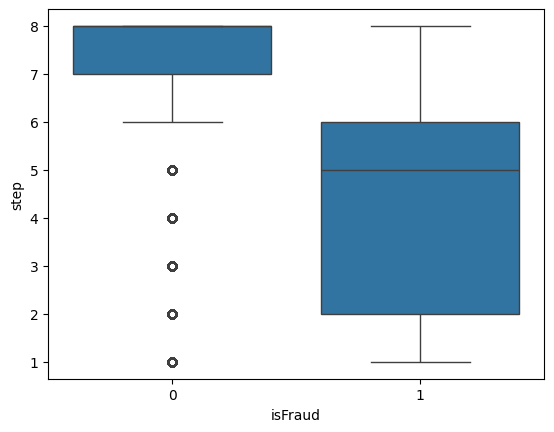

In [20]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

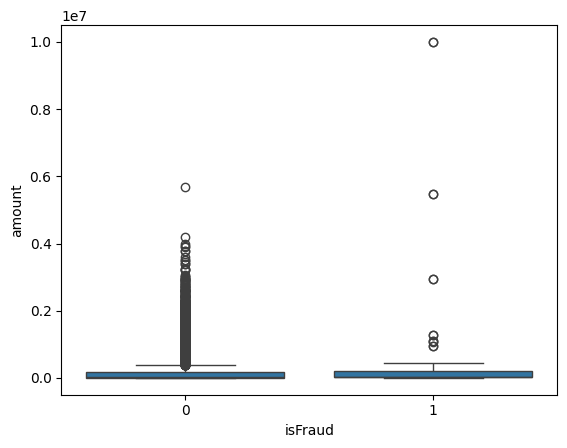

In [21]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

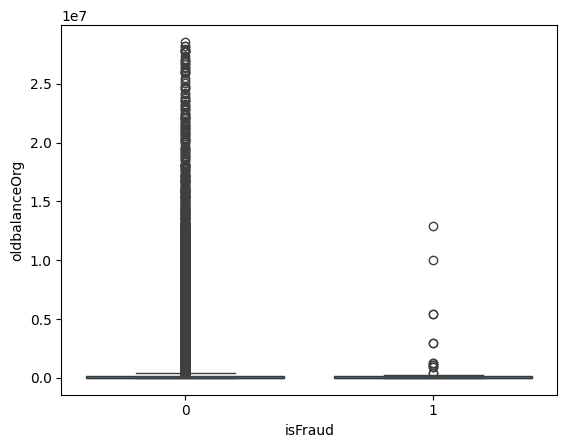

In [22]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

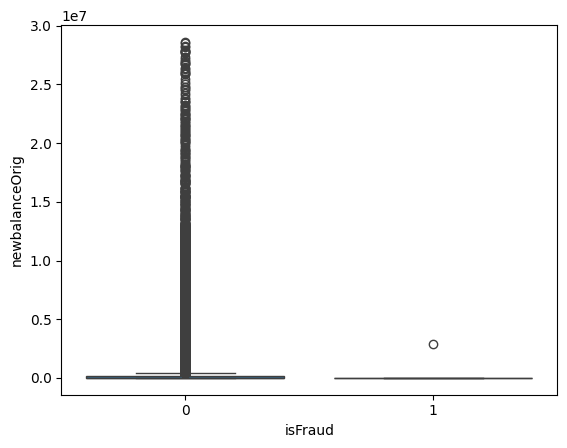

In [23]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

## Multivariate Analysis

<Axes: >

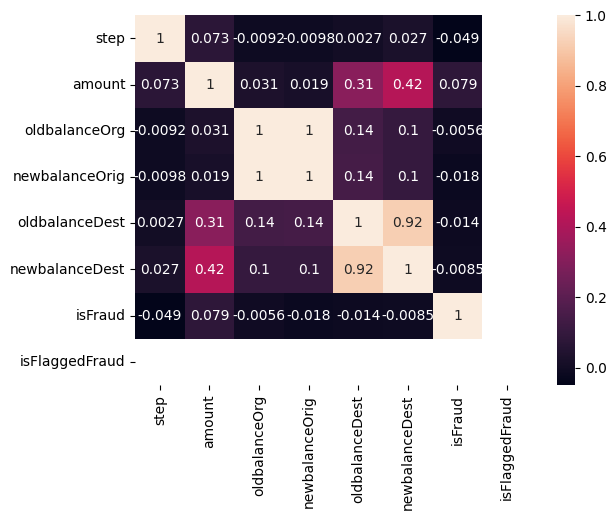

In [24]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [25]:
df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.078744
oldbalanceOrg    -0.005617
newbalanceDest   -0.008478
oldbalanceDest   -0.013648
newbalanceOrig   -0.017729
step             -0.049253
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

In [26]:
df['isFraud'].value_counts()

isFraud
0    29916
1       84
Name: count, dtype: int64

## Data Preprocessing

In [27]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [28]:
# Getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            30000 non-null  int64  
 1   type            30000 non-null  object 
 2   amount          30000 non-null  float64
 3   oldbalanceOrg   30000 non-null  float64
 4   newbalanceOrig  30000 non-null  float64
 5   oldbalanceDest  30000 non-null  float64
 6   newbalanceDest  30000 non-null  float64
 7   isFraud         30000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.8+ MB


In [29]:
# Size of dataset
df.shape

(30000, 8)

In [30]:
# Describing the dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000
mean,6.592933,1.376150e+05,8.663522e+05,8.829833e+05,8.633675e+05,1.193743e+06,0.002800
std,2.251725,3.033855e+05,2.495397e+06,2.534912e+06,2.541670e+06,3.104353e+06,0.052842
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.000000,6.078300e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,8.000000,2.075971e+04,2.005050e+04,4.246065e+03,0.000000e+00,0.000000e+00,0.000000
75%,8.000000,1.623463e+05,1.522215e+05,1.569253e+05,3.918882e+05,7.033162e+05,0.000000
max,8.000000,1.000000e+07,2.854724e+07,2.861740e+07,2.861740e+07,2.878359e+07,1.000000


In [31]:
# Checking for null values
df.isnull().any()
# no null values are present so no need for removal 

step              False
type              False
amount            False
oldbalanceOrg     False
newbalanceOrig    False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
dtype: bool

## Outlier Detection and Removal

<Axes: ylabel='amount'>

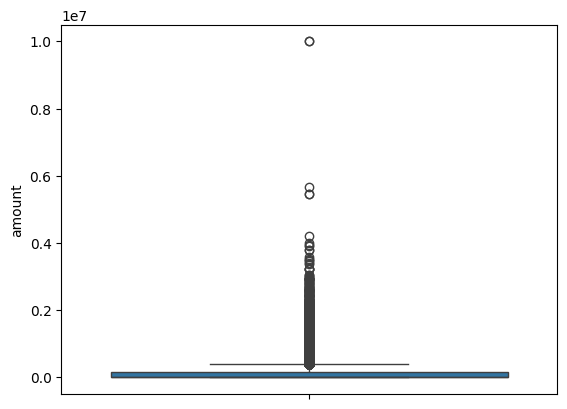

In [34]:
sns.boxplot(df['amount'])
# There are outliers in the amount column

<Axes: ylabel='step'>

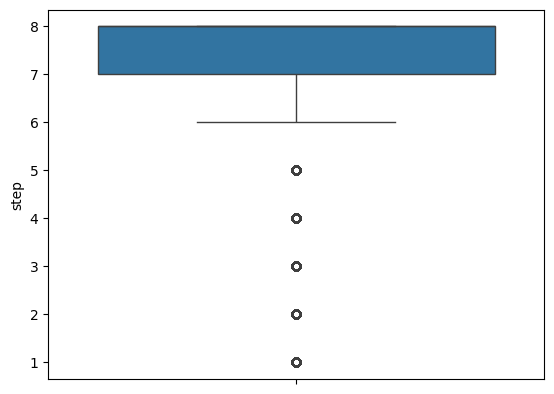

In [35]:
sns.boxplot(df['step'])

<Axes: ylabel='newbalanceOrig'>

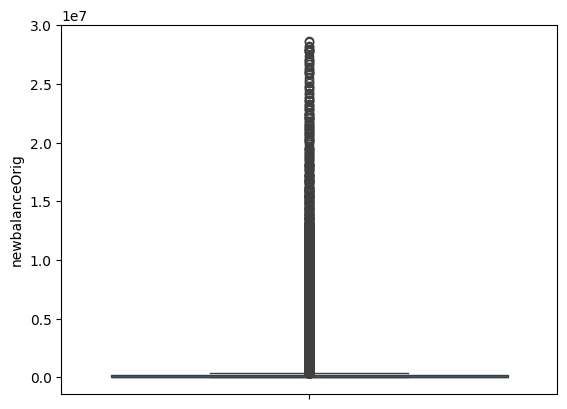

In [36]:
sns.boxplot(df['newbalanceOrig'])

<Axes: ylabel='oldbalanceOrg'>

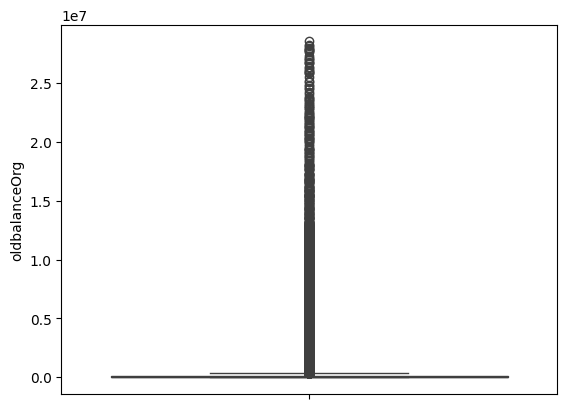

In [37]:
sns.boxplot(df['oldbalanceOrg'])

In [38]:
# Removing outliers using loop
from scipy import stats
amount_zscore=stats.zscore(df['amount'])
step_zscore=stats.zscore(df['step'])
newbalanceOrig_zscore=stats.zscore(df['newbalanceOrig'])
oldbalanceOrg_zscore=stats.zscore(df['oldbalanceOrg'])
df=df[np.abs(amount_zscore)<3]
df=df[np.abs(step_zscore)<3]
df=df[np.abs(newbalanceOrig_zscore)<3]
df=df[np.abs(oldbalanceOrg_zscore)<3]


/tmp/ipykernel_14219/2992249858.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[np.abs(step_zscore)<3]
/tmp/ipykernel_14219/2992249858.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[np.abs(newbalanceOrig_zscore)<3]
/tmp/ipykernel_14219/2992249858.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[np.abs(oldbalanceOrg_zscore)<3]


In [39]:
def transformationPlot(feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.distplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature,plot=plt)

/tmp/ipykernel_14219/479904814.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


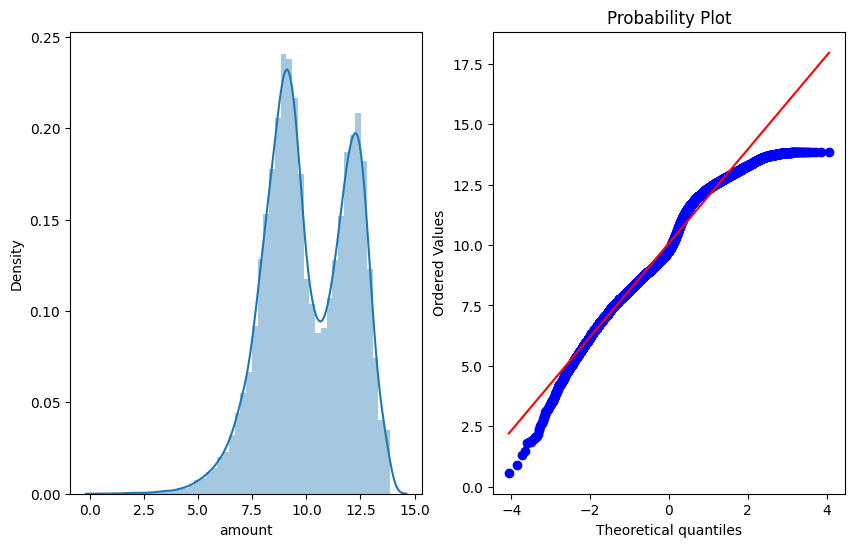

In [40]:
transformationPlot(np.log(df['amount']))

/tmp/ipykernel_14219/479904814.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


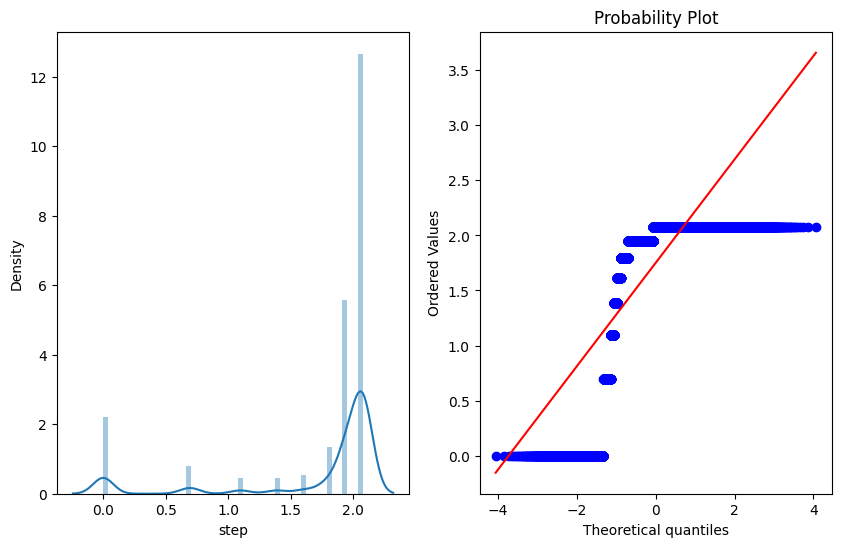

In [41]:
transformationPlot(np.log(df['step']))

In [42]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

## Model Training

<h4 style="color:green">Logistic Regression<h4>

In [43]:
# We will use the column isFraud as our target variable and we are Scaling the data

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
y=df['isFraud']
X=df.drop('isFraud',axis=1)
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.75,0.009399,0.020371,0.018889,0.00000,0.0
1,0.0,0.75,0.001779,0.002544,0.002284,0.00000,0.0
2,0.0,1.00,0.000171,0.000022,0.000000,0.00000,0.0
3,0.0,0.25,0.000171,0.000022,0.000000,0.00074,0.0
4,0.0,0.75,0.011145,0.004975,0.003522,0.00000,0.0


In [44]:
# Splitting the data in training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [45]:
# The given dataset is highly Imbalenced so we need to balance it
from imblearn.over_sampling import SMOTE 
y_train.value_counts()
sm=SMOTE(random_state=42)
x_train_smote,y_train_smote=sm.fit_resample(X_train,y_train)
print("The values after scaling are")
y_train_smote.value_counts()

The values after scaling are


isFraud
0    22862
1    22862
Name: count, dtype: int64

In [46]:
# Linear Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve
lr=LogisticRegression()
lr.fit(x_train_smote,y_train_smote)
y_pred=lr.predict(X_test)
print("Training Score",accuracy_score(y_train_smote,lr.predict(x_train_smote)))
print("Testing Accuracy",accuracy_score(y_test,y_pred))


Training Score 0.8445455340740092
Testing Accuracy 0.8216404886561954


In [47]:
confusion_matrix(y_test,y_pred)

array([[4698, 1016],
       [   6,   10]])

In [48]:
pd.crosstab(y_test,y_pred)

col_0,0,1
isFraud,,
0,4698,1016
1,6,10


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      5714
           1       0.01      0.62      0.02        16

    accuracy                           0.82      5730
   macro avg       0.50      0.72      0.46      5730
weighted avg       1.00      0.82      0.90      5730



<h4 style="color:green">Decision Tree<h4>

In [50]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(max_depth=3,splitter='best',criterion='entropy')
dc.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [51]:
y_pred=dc.predict(X_test)
print("Training Score",accuracy_score(y_train_smote,dc.predict(x_train_smote)))
print("Testing Accuracy",accuracy_score(y_test,y_pred))
# Plotting, showing the importance of each feature

Training Score 0.9462426734318957
Testing Accuracy 0.9738219895287958


In [52]:
import pickle
pickle.dump(dc,open('model_dc.pkl','wb'))

In [53]:
pd.crosstab(y_test,y_pred)

col_0,0,1
isFraud,,
0,5571,143
1,7,9


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      5714
           1       0.06      0.56      0.11        16

    accuracy                           0.97      5730
   macro avg       0.53      0.77      0.55      5730
weighted avg       1.00      0.97      0.98      5730



<h4 style="color:green">Random Forest<h4>

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(criterion='entropy', max_depth=5,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=50)
rfc.fit(x_train_smote,y_train_smote)


RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=50)

In [56]:
y_pred=rfc.predict(X_test)
print("Training Score",accuracy_score(y_train_smote,rfc.predict(x_train_smote)))
print("Testing Accuracy",accuracy_score(y_test,y_pred))
print(X_test.shape)

Training Score 0.988955471962208
Testing Accuracy 0.9778359511343805
(5730, 7)


In [57]:
pd.crosstab(y_test,y_pred)

col_0,0,1
isFraud,,
0,5593,121
1,6,10


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5714
           1       0.08      0.62      0.14        16

    accuracy                           0.98      5730
   macro avg       0.54      0.80      0.56      5730
weighted avg       1.00      0.98      0.99      5730



<h4 style="color:green">Extra Tree Classifier<h4>

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train_smote,y_train_smote)
y_pred=etc.predict(X_test)
print("Training Score",accuracy_score(y_train_smote,etc.predict(x_train_smote)))
print("Testing Accuracy",accuracy_score(y_test,y_pred))


Training Score 1.0
Testing Accuracy 0.9975567190226876


In [60]:
pd.crosstab(y_test,y_pred)

col_0,0,1
isFraud,,
0,5707,7
1,7,9


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5714
           1       0.56      0.56      0.56        16

    accuracy                           1.00      5730
   macro avg       0.78      0.78      0.78      5730
weighted avg       1.00      1.00      1.00      5730



In [81]:
etc.predict([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

/home/exterminator/train/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


array([0])